In [ ]:
# Importing the required Libraries

import numpy as np                    # numpy
import matplotlib.pyplot as plt       # matplotlib
import pandas as pd                   # pandas

In [ ]:
# Reading dataset from .csv file

dataset = pd.read_csv('sample_data/diabetes.csv') # reading diabetes.csv
dataset.head()                                    # checking the top values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


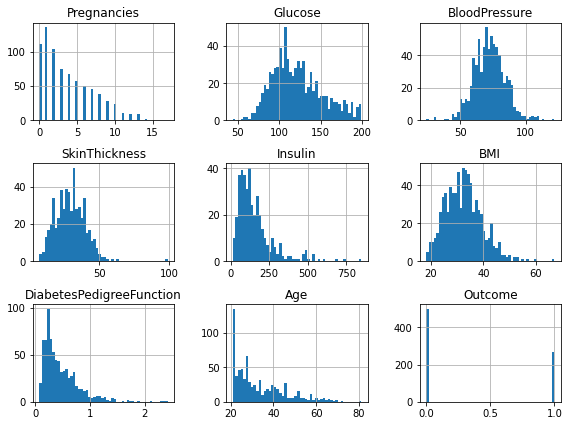

In [ ]:
# Replacing the missing or null entries in dataset by np.Nan

# Plotting the histograms of various parameters (columns) in dataset

col_missing = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for c in col_missing:                                                         # for loop
   dataset[c] = dataset[c].replace(0, np.nan)                                 # replace all the values in every column by np.nan value                        
dataset.hist(bins=50, figsize = (8.0, 6.0))                                   # function used to plot histogram, bins are the size of the BARs in histogram
plt.tight_layout(True)                                                        # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area. 
plt.show()                                                                    # plt. show() starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures


In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set


X = dataset.iloc[:, :-1].values                                                # all rows but exclude the last column
y = dataset.iloc[:, -1].values                                                 # all rows but include only the last column

In [ ]:
# Splitting the X and y in test and train sets. Train will be used to fit in the model for doing the 
# predictions on the test set

from sklearn.model_selection import train_test_split                                              # train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)      # keeping the test size as 0.3 and train size being 0.7, random_state is basically used for reproducing your problem the same every time it is run.     

In [ ]:
# SimpleImputer is used to handle the np.NaN values
# Replacing the missing values with median

from sklearn.impute import SimpleImputer                                                          # The SimpleImputer class provides basic strategies for imputing missing values
impute = SimpleImputer(missing_values = np.NaN, strategy='median')                                # replace all the np.nan values with a strategy called as median. It takes a median of every column and replaces every np.nan value of that respective column
X_train = impute.fit_transform(X_train)                                                           # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = impute.fit_transform(X_test)                                                             # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [ ]:
# StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

from sklearn.preprocessing import StandardScaler                                                  # StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. 
sc = StandardScaler()                                                                             
X_train = sc.fit_transform(X_train)                                                               # fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data 
X_test = sc.transform(X_test)                                                                     # The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

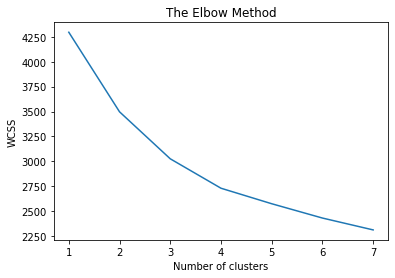

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)     # With random_state=42 , we get the same train and test sets across different executions
    kmeans.fit(X_train)           # training kmeans by providing X_train -> unsupervised learning model
    wcss.append(kmeans.inertia_)  # Calculating wcss which is the sum of squared distance between each point and the centroid in a cluster
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Predicting y_kmeans values by X_test features.

kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)


In [ ]:
# printing the unique labels
u_labels = np.unique(y_kmeans)
print(u_labels)

[0 1 2 3 4 5 6 7]


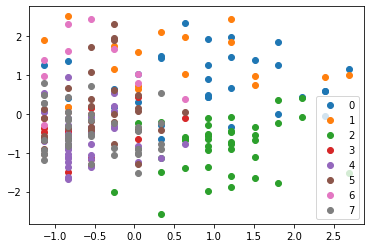

In [ ]:
#Plotting the scatter plot

for i in u_labels:
    plt.scatter(X_test[y_kmeans == i , 0] , X_test[y_kmeans == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
centroids = kmeans.cluster_centers_

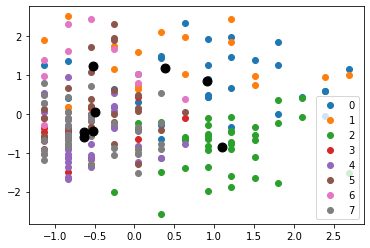

In [ ]:
#Plotting the scatter plot with the centroids

for i in u_labels:
    plt.scatter(X_test[y_kmeans == i , 0] , X_test[y_kmeans == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
print(y_kmeans)

[1 7 7 0 3 4 1 1 3 2 1 1 0 3 2 3 1 4 0 7 1 7 3 2 4 7 5 1 4 5 0 7 5 7 4 0 0
 5 7 5 3 7 4 5 6 5 4 4 7 5 2 4 1 0 7 4 4 7 5 2 0 6 4 3 5 1 0 5 2 2 4 2 7 1
 1 5 2 1 5 7 2 7 5 4 7 7 4 7 0 7 5 5 4 5 0 4 2 6 1 2 6 4 5 4 1 2 5 7 5 0 3
 2 0 1 6 0 3 6 5 2 7 0 7 0 5 4 5 2 0 5 7 2 4 6 2 2 4 2 5 4 4 0 4 2 2 4 4 2
 3 7 4 1 5 3 0 4 6 3 2 2 0 0 4 3 0 5 2 4 4 5 4 2 2 7 0 7 2 2 5 4 2 0 7 1 3
 2 7 5 7 3 0 2 2 7 5 0 1 6 4 2 4 4 3 0 7 3 7 7 5 4 5 4 0 4 5 2 3 7 0 7 7 4
 1 6 7 0 2 2 4 7 0]


In [ ]:
# Printing the confusion matrix of actual and predicted y_test values

# Computing accuracy_score to evaluate the accuracy of a classification. 

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_kmeans)
print(cm)
accuracy_score(y_test, y_kmeans)

[[17  4 22 15 40 25  6 28]
 [14 16 16  3  2  9  4 10]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


0.14285714285714285

In [ ]:
# Printing classification report to evaluate metric 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_kmeans))

              precision    recall  f1-score   support

           0       0.55      0.11      0.18       157
           1       0.80      0.22      0.34        74
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.14       231
   macro avg       0.17      0.04      0.07       231
weighted avg       0.63      0.14      0.23       231



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


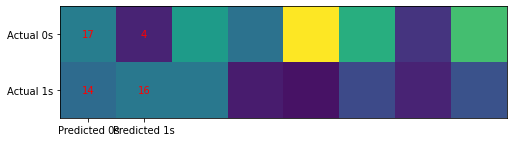

In [ ]:
# Creating multiple subplots to check the actual and the predicted value of the binary outcome

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
# Calculating Kmeans score to evaluate the quality of clusters

kmeans.score(X_test, y_kmeans)

-829.1738481120924

In [ ]:
# Checking roc_auc_score for y_test and y_pred. It provides area under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_kmeans)

0.3590118781201584